# Задание 1. Создать среду Taxi-v3, отобразить кадры среды, значение временного шага, код состояния, код действия, значение вознаграждения для 10 случайных действий.

In [ ]:
# Установка библиотеки Gym
!pip install gym

Инициализация и визуализация среды Taxi-v3, которая представляет собой задачу управления такси

In [ ]:
# Запускаем экземпля среды Taxi-v3
import gym
import time
env = gym.make('Taxi-v3', render_mode='human')

# Сбрасываем среду к начальному внутреннему состоянию
state = env.reset()
print(f"Начальное состояние: {state}")

Начальное состояние: 346


In [ ]:
# Вывод кадра текущего состояния среды "Taxi"
env.render()

In [ ]:
# Выполняем 10 случайных действий
for step in range(10):

    # Отображаем состояние среды
    env.render()

    # Генерим случайное действие
    action = env.action_space.sample()

    # Выполняем действие
    # Функция step среды возвращает состояние среды, которая возвращает 4 значения
    next_state, reward, done, info = env.step(action)

    # Печать информации о текущем шаге
    print(f"Шаг {step+1}:")
    print(f"Код состояния: {state}") # Предыдущее состояние
    print(f"Код действия: {action}")
    print(f"Вознаграждение: {reward}")
    print(f"Следующее состояние: {next_state}")
    print(f"Флаг завершения: {done}")
    print("_________________________")

    # Обновляем на следующее состояние
    state = next_state

    # Значие True указывает на завершение эпизода, то есть сбрасываем среду
    if done:
      print("\nЭпизод завершен! Сбрасываем среду.")
      env.render()
      break

# Закрываем среду
env.close()

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Шаг 1:
Код состояния: 346
Код действия: 1
Вознаграждение: -1
Следующее состояние: 246
Флаг завершения: False
_________________________
Шаг 2:
Код состояния: 246
Код действия: 3
Вознаграждение: -1
Следующее состояние: 226
Флаг завершения: False
_________________________
Шаг 3:
Код состояния: 226
Код действия: 1
Вознаграждение: -1
Следующее состояние: 126
Флаг завершения: False
_________________________
Шаг 4:
Код состояния: 126
Код действия: 0
Вознаграждение: -1
Следующее состояние: 226
Флаг завершения: False
_________________________
Шаг 5:
Код состояния: 226
Код действия: 5
Вознаграждение: -10
Следующее состояние: 226
Флаг завершения: False
_________________________
Шаг 6:
Код состояния: 226
Код действия: 3
Вознаграждение: -1
Следующее состояние: 206
Флаг завершения: False
_________________________
Шаг 7:
Код состояния: 206
Код действия: 1
Вознаграждение: -1
Следующее состояние: 106
Флаг завершения: False
_________________________
Шаг 8:
Код состояния: 106
Код действия: 5
Вознагражден

В Taxi-v3 эпизод завершается только при выполнении поставленной задачи — пассажир доставляется в нужное место. Генерация случайных действий (env.action_space.sample()) редко приводит к выполнению этой цели


# Задание 2. Используя библиотеку tensorflow, создайте, обучите и оцените свою модель, используя датасет, отличный от MNIST

1. Установка библиотеки Tensorflow

In [34]:
!pip install tensorflow

2. Импорт библиотек

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt


3. Загрузка и подготовка набора данных CIFAR-10

CIFAR-10 представляет собой цветные изображения с размерами 32x32 пикселя и 3 каналами (красный, зеленый и синий)

In [36]:
# Загрузим CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Нормализация данных
x_train, x_test = x_train / 255.0, x_test / 255.0

# Преобразование меток в одномерный массив
y_train = y_train.flatten()
y_test = y_test.flatten()

4. Создание тренировочного и тестового наборов данных

In [37]:
# Использование tf.data для пакетной обработки и перемешивания набора данных
# from_tensor_slices создаем набор данных из x и y
# shuffle(10000) для перемешивания будет использовать буфер размером 10.000
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)


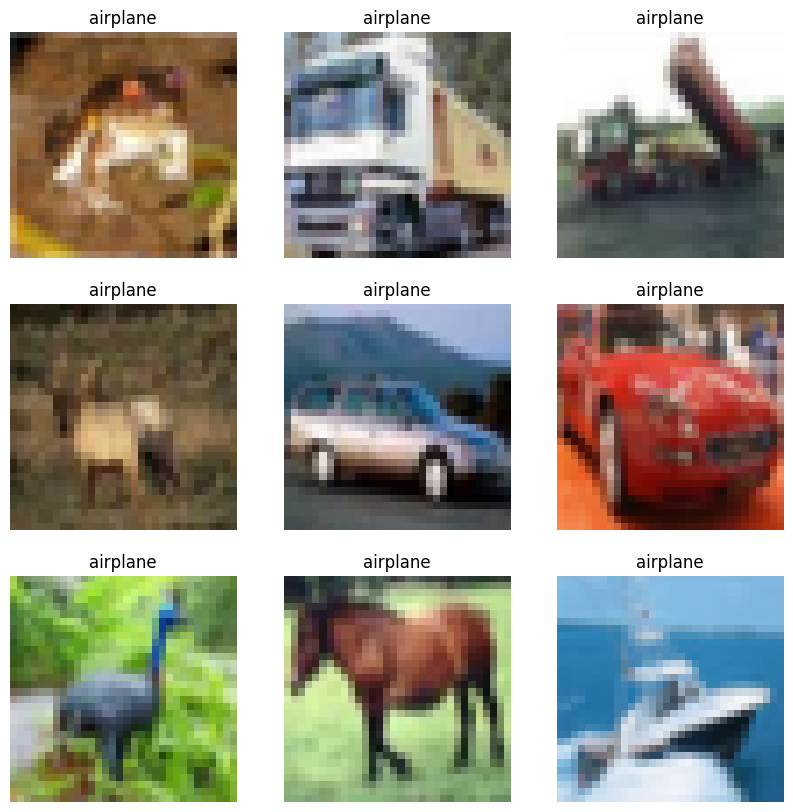

In [38]:
# Визуализируем несколько изображений из датасета
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i].argmax())])
    plt.axis("off")
plt.show()

5. Создание модели

У нас будет модель, которая представляет собой сверточную нейронку для классификации изображений с использованием двух сверточных слоев и двух полносвязанных слоев

In [39]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu', padding='same')  # Сверточный слой 1
        self.pool1 = MaxPooling2D(pool_size=(2, 2))  # Снижаем размерность
        self.conv2 = Conv2D(64, 3, activation='relu', padding='same')  # Сверточный слой 2
        self.pool2 = MaxPooling2D(pool_size=(2, 2))  # Снижаем размерность
        self.conv3 = Conv2D(128, 3, activation='relu', padding='same')  # Новый сверточный слой
        self.pool3 = MaxPooling2D(pool_size=(2, 2))  # Снижаем размерность
        self.flatten = Flatten()  # Преобразуем тензор в одномерный
        self.d1 = Dense(128, activation='relu')  # Полносвязный слой
        self.dropout = Dropout(0.3)
        self.d2 = Dense(10)  # Для 10 классов в CIFAR-10

    # На вход поступает изображение, которое проходит через все слови модели по очереди
    def call(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.pool3(x)
        x = self.flatten(x)
        x = self.d1(x)
        x = self.dropout(x)
        return self.d2(x)

# Создание экземпляра модели
model = MyModel()


Выбор оптимизатора и функции потерь для обучения

In [40]:
# Функция потерь для многоклассовой классификации, где метки класса представлены целыми числами
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# Оптимизатор, который автоматически регулирует шаг обучения для каждого параметра и ускоряет обучение
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)


Выбор показателей для измерения потерь и точности модели. Эти метрики
накапливают значения за эпохи, а затем выводят общий результат.

In [41]:
# Для вычисления среднего значения и точности
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

6. Обучение и тестирование модели

Использование tf.GradientTape для обучения модели

In [42]:
# Декоратор @tf.function ускоряет выполнение, преобразуя код в граф вычислений TensorFlow
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        # Прогоняем входные данные через модель, указывая training=True (важно для таких слоёв, как Dropout)
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)

    # Вычисляем градиенты функции потерь по отношению к обучаемым параметрам модели
    gradients = tape.gradient(loss, model.trainable_variables)
    # Обновляем параметры модели (веса и смещения) используя оптимизатор
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Обновляем метрики потерь и точности на тренировочных данных (сохр)
    train_loss(loss)
    train_accuracy(labels, predictions)


Тестирование модели

In [43]:
@tf.function
def test_step(images, labels):
    # Прогоняем входные данные через модель, указывая training=False (модель в режиме тестирования)
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [44]:
EPOCHS = 10
for epoch in range(EPOCHS):
  # Сброс накопленных значений метрик перед каждой эпохой
  train_loss.reset_state()
  train_accuracy.reset_state()
  test_loss.reset_state()
  test_accuracy.reset_state()

  # Обновляем параметры модели
  # Обучение
  for images, labels in train_ds:
      train_step(images, labels)

    # Тестирование
  for test_images, test_labels in test_ds:
      test_step(test_images, test_labels)

  print(f'Epoch {epoch + 1}, '
        f'Train Loss: {train_loss.result()}, '
        f'Train Accuracy: {train_accuracy.result() * 100}, '
        f'Test Loss: {test_loss.result()}, '
        f'Test Accuracy: {test_accuracy.result() * 100}')

Epoch 1, Train Loss: 1.4587513208389282, Train Accuracy: 47.34600067138672, Test Loss: 1.2065773010253906, Test Accuracy: 57.37000274658203
Epoch 2, Train Loss: 1.0448334217071533, Train Accuracy: 63.454002380371094, Test Loss: 1.0172746181488037, Test Accuracy: 65.0
Epoch 3, Train Loss: 0.8893352746963501, Train Accuracy: 68.88399505615234, Test Loss: 0.893649160861969, Test Accuracy: 69.19999694824219
Epoch 4, Train Loss: 0.7785236239433289, Train Accuracy: 73.03800201416016, Test Loss: 0.8290667533874512, Test Accuracy: 71.1300048828125
Epoch 5, Train Loss: 0.6947634816169739, Train Accuracy: 75.79600524902344, Test Loss: 0.8014608025550842, Test Accuracy: 72.38999938964844
Epoch 6, Train Loss: 0.6257031559944153, Train Accuracy: 78.302001953125, Test Loss: 0.7739652991294861, Test Accuracy: 73.45999908447266
Epoch 7, Train Loss: 0.5594082474708557, Train Accuracy: 80.40999603271484, Test Loss: 0.7626370191574097, Test Accuracy: 74.45999908447266
Epoch 8, Train Loss: 0.4965891838073

# Задание 3.
# 1. Самостоятельно изучить функции библиотеки PyTorch для Python: https://pytorch.org/get-started/locally/, https://pytorch.org/docs/stable/index.html
# 2. Используя библиотеку pytorch, повторить создание, обучение и оценку модели из Задания №2


1. Установка библиотеки Python

In [45]:
!pip install torch

Импорт библиотек

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

Преобразуем изображения в тензоры PyTorch в нормализованном диапазоне [-1,1]

In [61]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

Загрузка данных из torchvision.datasets

In [62]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


Создание моделии

In [63]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Первый сверточный слой с 32 фильтрами, размер ядра 3x3, padding сохраняет размер изображения
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # Уменьшение размерности в 2 раза
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(128 * 4 * 4, 128)  # Полносвязный слой
        self.dropout = nn.Dropout(0.1)
        self.fc2 = nn.Linear(128, 10)  # Полносвязный слой для 10 классов (CIFAR-10)

    def forward(self, x):
        # Последовательное прохождение через слои модели
        x = torch.relu(self.conv1(x))  # Активационная функция ReLU
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = torch.relu(self.conv3(x))
        x = self.pool3(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)  # Выходные логиты (не нормализованные вероятности)
        return x

# Создание экземпляра модели
model = MyModel()

Выбор оптимизатора и функции потерь для обучения

In [64]:
entropy = nn.CrossEntropyLoss()  # Функция потерь для многоклассовой классификации
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Оптимизатор Adam с шагом обучения 0.0005

Обучение модели

In [65]:
def train(model, trainloader, optimizer, entropy):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in trainloader:
        optimizer.zero_grad()  # Обнуляем градиенты
        outputs = model(images)
        loss = entropy(outputs, labels)  # Вычисляем потери
        loss.backward()
        optimizer.step()  # Обновляем параметры

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()  # Считаем верное количество примеров, которые были классифицирваоны
        total += labels.size(0)  # Общее количество примеров

    train_loss = running_loss / len(trainloader)
    train_accuracy = correct / total * 100
    return train_loss, train_accuracy

Тестирование модели

In [66]:
def test(model, testloader, entropy):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            loss = entropy(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    test_loss = running_loss / len(testloader)
    test_accuracy = correct / total * 100
    return test_loss, test_accuracy


In [67]:
# Обучение и тестирование модели
EPOCHS = 5
for epoch in range(EPOCHS):
    train_loss, train_accuracy = train(model, trainloader, optimizer, entropy)
    test_loss, test_accuracy = test(model, testloader, entropy)

    print(f'Epoch {epoch + 1}, '
          f'Train Loss: {train_loss:.4f}, '
          f'Train Accuracy: {train_accuracy:.2f}%, '
          f'Test Loss: {test_loss:.4f}, '
          f'Test Accuracy: {test_accuracy:.2f}%')

Epoch 1, Train Loss: 1.3415, Train Accuracy: 51.45%, Test Loss: 1.0412, Test Accuracy: 62.72%
Epoch 2, Train Loss: 0.9352, Train Accuracy: 67.27%, Test Loss: 0.8705, Test Accuracy: 69.23%
Epoch 3, Train Loss: 0.7652, Train Accuracy: 73.21%, Test Loss: 0.8066, Test Accuracy: 72.55%
Epoch 4, Train Loss: 0.6573, Train Accuracy: 77.07%, Test Loss: 0.7763, Test Accuracy: 73.42%
Epoch 5, Train Loss: 0.5720, Train Accuracy: 79.92%, Test Loss: 0.7561, Test Accuracy: 75.02%
